In [5]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# charger les données de crédit des titulaires de cartes de crédit dans un DataFrame Pandas
df = pd.read_excel("default of credit card clients.xls")






In [6]:
# Pour afficher le nombre de lignes et de colonnes
df.shape

# Afficher les 5 premières lignes du DataFrame
print(df.head())




  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23             

In [7]:
#afficher les lignes 
df.shape



(30001, 25)

In [8]:
# tail() affiche les 5 dernières lignes. 
#Pour voir moins ou plusieurs lignes, passer un entier, par exemple: tail(3)
df.tail(10)



,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29991,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29992,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29993,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29994,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29995,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [9]:
# afficher les noms de colonnes 
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [10]:
#afficher les colones qui on le type object
df_obj = df.select_dtypes(include='object').columns
print(df_obj)


Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')


In [11]:

#convertir toutes valeurs de type object en valeurs de type numeric 
for col in df.columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')



In [12]:
#afficher les colones qui on le type object
df_obj = df.select_dtypes(include='object').columns
print(df_obj)

Index([], dtype='object')


In [13]:
# Sélectionner seulement les colonnes de chaîne du dataframe
df_num = df.select_dtypes(include='number')
print(df_num)

       Unnamed: 0        X1   X2   X3   X4    X5   X6   X7   X8   X9  ...  \
0             NaN       NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  ...   
1             1.0   20000.0  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...   
2             2.0  120000.0  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   
3             3.0   90000.0  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...   
4             4.0   50000.0  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...   
...           ...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
29996     29996.0  220000.0  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...   
29997     29997.0  150000.0  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   
29998     29998.0   30000.0  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...   
29999     29999.0   80000.0  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...   
30000     30000.0   50000.0  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...   

           X15      X16      X17      X18      X19      X20     X21      X2

In [ ]:
#supprimer tous les lignes qui on des valeurs null
df = df.dropna()
 

In [14]:
#savoir des infos sur la base 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30000 non-null  float64
 1   X1          30000 non-null  float64
 2   X2          30000 non-null  float64
 3   X3          30000 non-null  float64
 4   X4          30000 non-null  float64
 5   X5          30000 non-null  float64
 6   X6          30000 non-null  float64
 7   X7          30000 non-null  float64
 8   X8          30000 non-null  float64
 9   X9          30000 non-null  float64
 10  X10         30000 non-null  float64
 11  X11         30000 non-null  float64
 12  X12         30000 non-null  float64
 13  X13         30000 non-null  float64
 14  X14         30000 non-null  float64
 15  X15         30000 non-null  float64
 16  X16         30000 non-null  float64
 17  X17         30000 non-null  float64
 18  X18         30000 non-null  float64
 19  X19         30000 non-nul

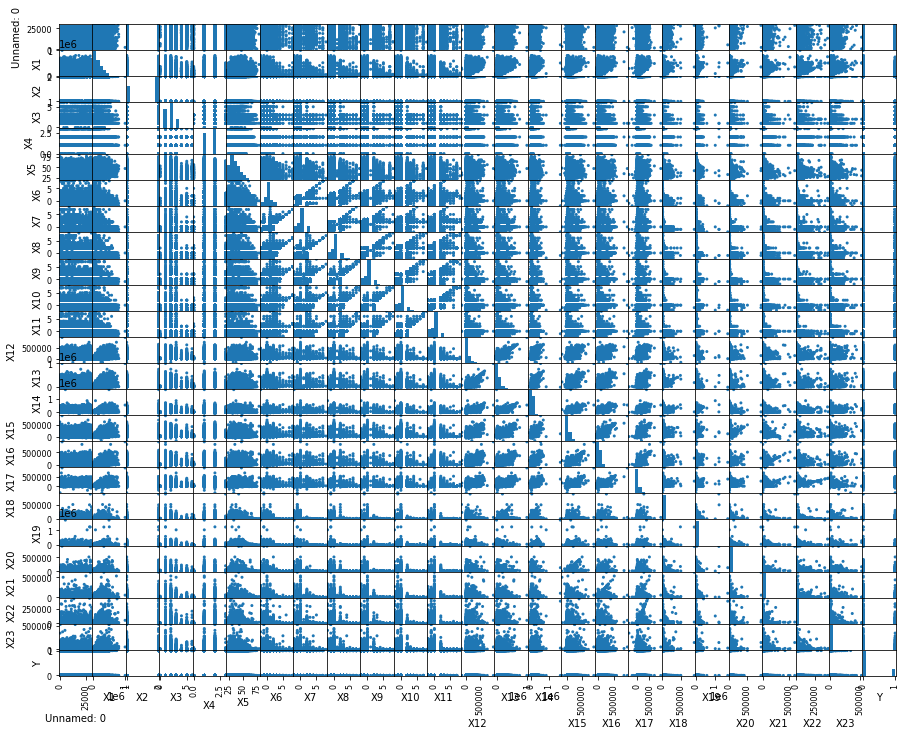

In [12]:
pd.plotting.scatter_matrix(df,alpha=1, figsize=(15,12));



In [15]:
#vérifier s'il y a des valeurs manquantes (NaN) dans le DataFrame
df.isnull().values.any()


True

In [16]:
#retourne la somme de toutes les valeurs nulles dans le dataframe df
df.isnull().sum().sum()

25

In [17]:
df.isna()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
#Remplacer les valeurs manquantes (NaN) dans un DataFrame par par la moyenne des valeurs de chaque colonne
df.fillna(df.mean())

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,15000.5,167484.322667,1.603733,1.853133,1.551867,35.4855,-0.0167,-0.133767,-0.1662,-0.220667,...,43262.948967,40311.400967,38871.7604,5663.5805,5921.1635,5225.6815,4826.076867,4799.387633,5215.502567,0.2212
1,1.0,20000.000000,2.000000,2.000000,1.000000,24.0000,2.0000,2.000000,-1.0000,-1.000000,...,0.000000,0.000000,0.0000,0.0000,689.0000,0.0000,0.000000,0.000000,0.000000,1.0000
2,2.0,120000.000000,2.000000,2.000000,2.000000,26.0000,-1.0000,2.000000,0.0000,0.000000,...,3272.000000,3455.000000,3261.0000,0.0000,1000.0000,1000.0000,1000.000000,0.000000,2000.000000,1.0000
3,3.0,90000.000000,2.000000,2.000000,2.000000,34.0000,0.0000,0.000000,0.0000,0.000000,...,14331.000000,14948.000000,15549.0000,1518.0000,1500.0000,1000.0000,1000.000000,1000.000000,5000.000000,0.0000
4,4.0,50000.000000,2.000000,2.000000,1.000000,37.0000,0.0000,0.000000,0.0000,0.000000,...,28314.000000,28959.000000,29547.0000,2000.0000,2019.0000,1200.0000,1100.000000,1069.000000,1000.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996.0,220000.000000,1.000000,3.000000,1.000000,39.0000,0.0000,0.000000,0.0000,0.000000,...,88004.000000,31237.000000,15980.0000,8500.0000,20000.0000,5003.0000,3047.000000,5000.000000,1000.000000,0.0000
29997,29997.0,150000.000000,1.000000,3.000000,2.000000,43.0000,-1.0000,-1.000000,-1.0000,-1.000000,...,8979.000000,5190.000000,0.0000,1837.0000,3526.0000,8998.0000,129.000000,0.000000,0.000000,0.0000
29998,29998.0,30000.000000,1.000000,2.000000,2.000000,37.0000,4.0000,3.000000,2.0000,-1.000000,...,20878.000000,20582.000000,19357.0000,0.0000,0.0000,22000.0000,4200.000000,2000.000000,3100.000000,1.0000
29999,29999.0,80000.000000,1.000000,3.000000,1.000000,41.0000,1.0000,-1.000000,0.0000,0.000000,...,52774.000000,11855.000000,48944.0000,85900.0000,3409.0000,1178.0000,1926.000000,52964.000000,1804.000000,1.0000


In [26]:
#vérifier s'il y a des valeurs manquantes (NaN) dans le DataFrame
df.isnull().values.any()


True

In [27]:
#retourne la somme de toutes les valeurs nulles dans le dataframe df
df.isnull().sum().sum()

25

In [25]:
#retourne un tableau contenant des statistiques descriptives pour chaque colonne numérique du DataFrame.
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [28]:
#Cela remplira toutes les valeurs nulles dans le dataframe df avec la valeur mediane de chaque colonne
df.fillna(df.median())

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,15000.5,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,19052.0,18104.5,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996.0,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,29997.0,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,29998.0,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,29999.0,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [29]:
#vérifier s'il y a des valeurs manquantes (NaN) dans le DataFrame
df.isnull().values.any()

True

In [30]:
#retourne la somme de toutes les valeurs nulles dans le dataframe df
df.isnull().sum().sum()

25

In [31]:
#retourne un tableau contenant des statistiques descriptives pour chaque colonne numérique du DataFrame.
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
#(most frequent value) with 1 colone 
df['Unnamed: 0'].mode()[0]


1.0

In [39]:
#(most frequent value) with 1 colone 
df['X1'].mode()[0]

50000.0

In [36]:
#(most frequent value) with all colones
cols = ['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y']

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    print(df)

       Unnamed: 0        X1   X2   X3   X4    X5   X6   X7   X8   X9  ...  \
0             1.0   50000.0  2.0  2.0  2.0  29.0  0.0  0.0  0.0  0.0  ...   
1             1.0   20000.0  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...   
2             2.0  120000.0  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   
3             3.0   90000.0  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...   
4             4.0   50000.0  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...   
...           ...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
29996     29996.0  220000.0  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...   
29997     29997.0  150000.0  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   
29998     29998.0   30000.0  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...   
29999     29999.0   80000.0  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...   
30000     30000.0   50000.0  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...   

           X15      X16      X17      X18      X19      X20     X21      X2

       Unnamed: 0        X1   X2   X3   X4    X5   X6   X7   X8   X9  ...  \
0             1.0   50000.0  2.0  2.0  2.0  29.0  0.0  0.0  0.0  0.0  ...   
1             1.0   20000.0  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...   
2             2.0  120000.0  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   
3             3.0   90000.0  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...   
4             4.0   50000.0  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...   
...           ...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
29996     29996.0  220000.0  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...   
29997     29997.0  150000.0  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   
29998     29998.0   30000.0  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...   
29999     29999.0   80000.0  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...   
30000     30000.0   50000.0  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...   

           X15      X16      X17      X18      X19      X20     X21      X2

In [40]:
#retourne un tableau contenant des statistiques descriptives pour chaque colonne numérique du DataFrame.
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,15000.000033,167480.406653,1.603747,1.853138,1.551882,35.485284,-0.016699,-0.133762,-0.166194,-0.220659,...,43261.506916,40310.057298,38870.464718,5663.391720,5.920966e+03,5225.507316,4825.916003,4799.227659,5215.328722,0.221193
std,8660.686992,129747.272048,0.489126,0.790336,0.521967,9.217826,1.123783,1.197166,1.196848,1.169120,...,64332.268796,60796.587940,59553.537820,16563.036573,2.304051e+04,17606.693867,15665.923417,15278.076165,17777.194983,0.415057
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.000000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,251.000000,117.000000,0.000000
50%,15000.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.000000,17068.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54503.000000,50185.000000,49196.000000,5006.000000,5.000000e+03,4505.000000,4013.000000,4031.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [41]:
#vérifier s'il y a des valeurs manquantes (NaN) dans le DataFrame

#false with  most frequent mode  donne 
df.isnull().values.any()

False

In [42]:
#retourne la somme de toutes les valeurs nulles dans le dataframe df
df.isnull().sum().sum()

0